In [2]:
#Gauss Seidel
import numpy as np

x = [[[10, 2, 1],
      [1, -8, 2],
      [2, 3, -9]],
    [[-12, 2, -3],
     [3, 9, 1],
     [-2, 1, 10]],
    [[11, -1, 3],
     [2, 7, -2],
     [3, 2, 9]],
    [[-10, 5, 1],
     [-4, 11, -3],
     [-2, 3, -8]],
    [[8, 1, -2],
     [-3, 10, 2],
     [-1, -2, 9]]]

y = [[40, 1150, 18],
    [25, -10, 15],
    [30, -10, 12],
    [80, -700, 140],
    [15, 10, -5]]

x = np.array(x)
y = np.array(y)

def diag_check(matrix):
    diag = np.abs(np.diagonal(matrix))
    non_diag = np.sum(np.abs(matrix), axis = 1) - diag
    for i in range(len(matrix)):
        if diag[i] < non_diag[i]:
            return False
    return True

def gauss_seidel(x, y, e = 0.032, n = 8):
    if not diag_check(x):
        print("Not diagonally dominant")
        return
    x = x.copy()
    prev_guess = np.zeros(np.shape(x[0]))
    diag = np.diag(x).copy()
    np.fill_diagonal(x, 0)
    for i in range(n):
        new_guess = np.array(prev_guess)
        for j, row in enumerate(x):
            new_guess[j] = (y[j] - np.dot(row, new_guess)) / diag[j]
        print(f"iter #{i} = {new_guess}")

        euclidean_distance = np.sqrt(np.dot(new_guess-prev_guess, new_guess-prev_guess))
        prev_guess = new_guess
        if euclidean_distance < e:
            print("Converged")
            return

for i in range(len(x)):
    print(f"Equation #{i + 1}:")
    gauss_seidel(x[i], y[i])
    print("\n")

Equation #1:
iter #0 = [   4.         -143.25        -48.86111111]
iter #1 = [  37.53611111 -151.27326389  -44.08306327]
iter #2 = [  38.6629591  -149.93789593  -43.38752995]
iter #3 = [  38.32633218 -149.80609097  -43.41840095]
iter #4 = [  38.30305829 -149.81671795  -43.42711525]
Converged


Equation #2:
iter #0 = [-2.08333333 -0.41666667  1.125     ]
iter #1 = [-2.43402778 -0.42476852  1.0556713 ]
iter #2 = [-2.41804591 -0.42239262  1.05863008]
Converged


Equation #3:
iter #0 = [ 2.72727273 -2.20779221  0.91486291]
iter #1 = [ 2.27705628 -1.81776953  0.97826336]
iter #2 = [ 2.29522185 -1.80484528  0.96933611]
Converged


Equation #4:
iter #0 = [ -8.         -66.54545455 -40.45454545]
iter #1 = [-45.31818182 -91.14876033 -40.35123967]
iter #2 = [-57.60950413 -95.59015778 -38.94393313]
iter #3 = [-59.6894722  -95.96269893 -38.56364405]
iter #4 = [-59.83771387 -95.91288978 -38.5079052 ]
iter #5 = [-59.80723541 -95.8866052  -38.5056681 ]
iter #6 = [-59.79386941 -95.88113472 -38.5069581

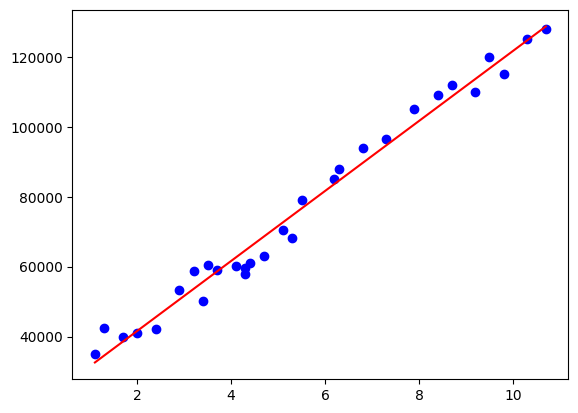

In [1]:
# Least Square Regression
import numpy as np
import matplotlib.pyplot as plt

x = [1.1, 1.3, 1.7, 2.0, 2.4, 2.9, 3.2, 3.4, 3.5, 3.7, 4.1, 4.3, 4.3, 4.4, 4.7, 5.1,
        5.3, 5.5, 6.2, 6.3, 6.8, 7.3, 7.9, 8.4, 8.7, 9.2, 9.5, 9.8, 10.3, 10.7]

y = [35010.0, 42500.0, 39800.0, 41050.0, 42100.0, 53200.0, 58700.0, 50200.0, 60500.0, 59000.0,
        60100.0, 58000.0, 59500.0, 61000.0, 63000.0, 70500.0, 68200.0, 79000.0, 85000.0, 88000.0,
        94000.0, 96500.0, 105000.0, 109000.0, 112000.0, 110000.0, 120000.0, 115000.0, 125000.0, 128000.0]

x = np.array(x)
y = np.array(y)

matrix = np.vstack([x, np.ones(len(x))]).T
y = y[:, np.newaxis]
coeff = np.dot(np.linalg.pinv(matrix), y)
y_pred = coeff[0] * x + coeff[1]

plt.plot(x, y, 'bo')
plt.plot(x, y_pred, 'r-')
plt.show()

In [ ]:
# Newton-Raphson
import numpy as np
def f(x):
    return 15 * x**5 + 6 * x**4 - 9
def g(x):
    return 75 * x**4 + 24 * x**3

def newton_raphson(x0, tolerance = 0.032, n = 25):
    for i in range(n):
        x1 = x0 - f(x0)/g(x0)
        print(f"Iteration #{i+1}: {x1} with result {f(x1)}")
        if np.abs(f(x1)) < tolerance:
            print(f"the root of equation is: {x1}")
            return
        x0 = x1

        if i == n-1:
            print("Max iteration, ERROR")

newton_raphson(3)

In [51]:
# Riemann Integral
def f(x):
    return x**4 - 13 * x**3 + 36

xmin = -2
xmax = 2
n = 50

x = np.linspace(xmin, xmax, n)
width = x[1] - x[0]

#Left Riemann
total_height_left = np.sum(f(x[0:n-1]))
area_left = width * total_height_left
print(f"Left Riemann Area: {area_left}")

# Right Riemann
total_height_right = np.sum(f(x[1:n]))
area_right = width * total_height_right
print(f"Right Riemann Area: {area_right}")

# Mid Riemann
mid = (x[0:n-1] + x[1:n]) / 2
total_height_mid = np.sum(f(mid))
area_mid = width * total_height_mid
print(f"Mid Riemann Area: {area_mid}")

# Trapezoid Riemann
a = np.sum(f(x[0:n-1]))
b = np.sum(f(x[1:n]))
area_trapezoid = width * (a + b) / 2
print(f"Trapezoid Riemann Area: {area_trapezoid}")

Left Riemann Area: 165.32533074428784
Right Riemann Area: 148.34573890755308
Mid Riemann Area: 156.78223480741158
Trapezoid Riemann Area: 156.83553482592046
